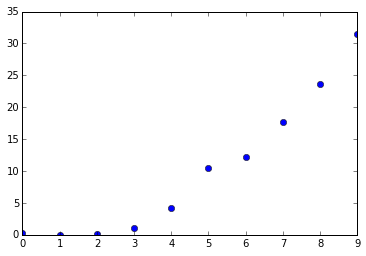

In [28]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt


r = 5
N = 10
K = 4
s = 0.1
q = 100*s

x = np.arange(N)

e = np.sqrt(s) * np.random.randn(N)
e[r] = np.sqrt(q) * np.random.randn(1)

# Create the vandermonde matrix
W = x.reshape((N,1))**np.arange(K).reshape(1,K)
a = np.array([0,-1,0.5,0])
y = np.dot(W, a) + e


plt.plot(x, y, 'o')
#plt.plot(e)
plt.show()






In [42]:
W


array([[  1,   0,   0,   0],
       [  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   4,  16,  64],
       [  1,   5,  25, 125],
       [  1,   6,  36, 216],
       [  1,   7,  49, 343],
       [  1,   8,  64, 512],
       [  1,   9,  81, 729]])




$$
\mathcal{L}(r, a) = \log \mathcal{N}(y_r; W_r a, q)  \prod_{i\neq r} \mathcal{N}(y_i; W_i a, s) 
$$

$$
\log\mathcal{N}(y_r; W_r a, q) = -\frac{1}{2}\log 2\pi q - \frac{1}{2} \frac{1}{q} (y_r - W_r a)^2
$$

$$
\log\mathcal{N}(y_i; W_i a, s) = -\frac{1}{2}\log 2\pi s - \frac{1}{2} \frac{1}{s} (y_i - W_i a)^2
$$

$$
\mathcal{L}(r, a) = -\frac{1}{2}\log 2\pi q - \frac{1}{2} \frac{1}{q} (y_r - W_r a)^2 + \sum_{i\neq r} -\frac{1}{2}\log 2\pi s - \frac{1}{2} \frac{1}{s} (y_i - W_i a)^2 
$$

$$
\mathcal{L}(r, a) = -\frac{1}{2}\log 2\pi q - \sum_{i\neq r} \frac{1}{2}\log 2\pi s - \frac{1}{2} \frac{1}{q} (y_r - W_r a)^2 - \frac{1}{2} \frac{1}{s} \sum_{i\neq r}  (y_i - W_i a)^2 
$$

$$
D_r = \diag(s,s,\dots, q, \dots, s)^{-1}
$$

$$
\mathcal{L}(r, a) = -\frac{1}{2}\log 2\pi q - \frac{N-1}{2}\log 2\pi s - \frac{1}{2} (y - Wa)^\top D_r (y - Wa) 
$$

$$
\mathcal{L}(r, a) =^+ - \frac{1}{2} (y - Wa)^\top D_r (y - Wa) 
$$

\begin{eqnarray}
\mathcal{L}(r, a) =^+ - \frac{1}{2} y D_r y^\top  + y^\top D_r W a - \frac{1}{2} a^\top W^\top D_r Wa
\end{eqnarray}

\begin{eqnarray}
\frac{\partial}{\partial a}\mathcal{L}(r, a) & = &    W^\top D_r y  - W^\top D_r W a = 0 \\
 W^\top D_r y  & = & W^\top D_r W a = 0 \\
 (W^\top D_r W)^{-1} W^\top D_r y  & = &  a_r^*  \\
\end{eqnarray}

To use standard Least Square solver, we substitute
\begin{eqnarray}
V_r^\top \equiv W^\top D_r^{1/2} \\
V_r \equiv  D_r^{1/2} W \\
\end{eqnarray}

\begin{eqnarray}
(V_r^\top V_r)^{-1} V_r^\top D_r^{1/2} y  & = &  a_r^* 
\end{eqnarray}


In Matlab/Octave this is least square with

\begin{eqnarray}
 a_r^*  = V_r \backslash D_r^{1/2} y
\end{eqnarray}






-34.4592291237
-33.9867907459
-34.3806944536
-33.0821149658
-29.4233461662
-2.21286733069
-30.7562932215
-34.1309706001
-33.0628373568
-31.355214757


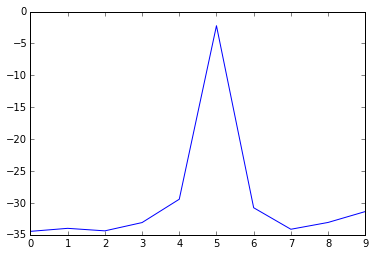

In [65]:
import scipy.linalg as la

LL = np.zeros(N)
for rr in range(N):
    ss = s*np.ones(N)
    ss[rr] = q
    D_r = np.diag(1/ss)
    V_r = np.dot(np.sqrt(D_r), W)
    b = y/np.sqrt(ss)

    a_r,re,ra, cond = la.lstsq(V_r, b)

    e = (y-np.dot(W, a_r))/np.sqrt(ss)
    LL[rr] = -0.5*np.dot(e.T, e)
    print(LL[rr])

#plt.plot(x, y, 'o')
#plt.plot(x, np.dot(W, a_r),'-')
#plt.plot(e)
plt.plot(LL)
plt.show()



Todo: Evaluate the likelihood for all polynomial orders $K=1 \dots 8$


$p(x_1, x_2) = \mathcal{N}(\mu, \Sigma)$

$\mu = \left(\begin{array}{c} \mu_{1} \\
 \mu_{2} \end{array} \right)$

$\Sigma = \left(\begin{array}{cc} \Sigma_{11} & \Sigma_{12} \\
\Sigma_{12}^\top & \Sigma_{22} \end{array} \right)$

$
p(x_1 | x_2) = \mathcal{N}(\mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (x_2 -\mu_2), \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1}\Sigma_{12}^\top)
$


In [27]:
import numpy as np
import scipy as sc

import scipy.linalg as la


def cond_Gauss(Sigma, mu, idx1, idx2, x2):
    Sigma11 = Sigma[idx1, idx1].reshape((len(idx1),len(idx1)))
    Sigma12 = Sigma[idx1, idx2].reshape((len(idx1),len(idx2)))
    Sigma22 = Sigma[idx2, idx2].reshape((len(idx2),len(idx2)))

#    print(Sigma11)
#    print(Sigma12)
#    print(Sigma22)
    
    
    mu1 = mu[idx1]
    mu2 = mu[idx2]

    G = np.dot(Sigma12, la.inv(Sigma22))
    cond_Sig_1 =  Sigma11 - np.dot(G, Sigma12.T)
    cond_mu_1 = mu1 + np.dot(G, (x2-mu2))

    return cond_mu_1, cond_Sig_1


mu = np.array([0,0])

#P = np.array([2])
#A = np.array([1])

idx1 = [0]
idx2 = [1]
x2 = 5

P = np.array(3).reshape((len(idx1), len(idx1)))
A = np.array(-1).reshape((len(idx2), len(idx1)))

rho = np.array(0)

#Sigma = np.array([[P, A*P],[P*A, A*P*A + rho ]])

I = np.eye(len(idx2))
Sigma = np.concatenate((np.concatenate((P,np.dot(P, A.T)),axis=1), np.concatenate((np.dot(A, P),np.dot(np.dot(A, P), A.T ) + rho*I ),axis=1)))

print(Sigma)
#print(mu)



cond_mu_1, cond_Sig_1 = cond_Gauss(Sigma, mu, idx1, idx2, x2)
print('E[x_1|x_2 = {}] = '.format(x2) , cond_mu_1)
print(cond_Sig_1)

[[ 3. -3.]
 [-3.  3.]]
E[x_1|x_2 = 5] =  [-5.]
[[ 0.]]



SUppose we are given a data set $(y_i, x_i)$ for $i=1\dots N$

Assume we have a basis regression model (for example a polynomial basis where $f_k(x) = x^k$) and wish to fit
$y_i = \sum_k A_{ik} w_k + \epsilon_i$
for all $i = 1 \dots N$ where 
$
A_{ik} = f_k(x_i)
$

Assume the prior

$
w \sim \mathcal{N}(w; 0, P)
$

Derive an expression for $p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N})$ and implement a program that plots the mean and corresponding errorbars (from standard deviation of $p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N})$) by choosing $y_{\text{new}}$ on a regular grid. 

Note that $y_{\text{new}} = \sum f_k(x_{\text{new}}) w_k + \epsilon$





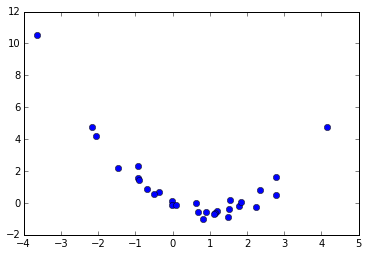

In [33]:
# Use this code to generate a dataset

N = 30
K = 4
s = 0.1
q = 10*s

x = 2*np.random.randn(N)
e = np.sqrt(s) * np.random.randn(N)

# Create the vandermonde matrix
A = x.reshape((N,1))**np.arange(K).reshape(1,K)
w = np.array([0,-1,0.5,0])
y = np.dot(A, w) + e


plt.plot(x, y, 'o')
#plt.plot(e)
plt.show()


In [23]:

# Sig = [P, A.T; A A*A.T+rho*I]


print(np.eye(3))


[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
